In [63]:
import pandas
url = "weatherHistory.csv"
data = pandas.read_csv(url)
#print(data)
peek = data.head(800)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.89,14.120,251.0,15.826,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.86,14.265,259.0,15.826,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.89,3.928,204.0,14.957,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.83,14.104,269.0,15.826,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.83,11.045,259.0,15.826,0.0,1016.51,Partly cloudy throughout the day.


In [64]:
shape = data.shape
print(shape)

(96453, 12)


In [65]:
types = data.dtypes
print(types)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [66]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
description = data.describe()
print(description)


       Temperature (C)  Apparent Temperature (C)   Humidity  Wind Speed (km/h)  \
count        96453.000                 96453.000  96453.000          96453.000   
mean            11.933                    10.855      0.735             10.811   
std              9.552                    10.697      0.195              6.914   
min            -21.822                   -27.717      0.000              0.000   
25%              4.689                     2.311      0.600              5.828   
50%             12.000                    12.000      0.780              9.966   
75%             18.839                    18.839      0.890             14.136   
max             39.906                    39.344      1.000             63.853   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  
count               96453.000        96453.000     96453.0             96453.000  
mean                  187.509           10.347         0.0              1003.236  
std         

In [67]:
print("inter quartile range")
iqr=description.iloc[6]-description.iloc[4]
print(iqr)

inter quartile range
Temperature (C)              14.150
Apparent Temperature (C)     16.528
Humidity                      0.290
Wind Speed (km/h)             8.308
Wind Bearing (degrees)      174.000
Visibility (km)               6.472
Loud Cover                    0.000
Pressure (millibars)          9.190
dtype: float64


In [68]:
summary_counts = data.groupby('Summary').size()
print(summary_counts)

Summary
Breezy                                    54
Breezy and Dry                             1
Breezy and Foggy                          35
Breezy and Mostly Cloudy                 516
Breezy and Overcast                      528
Breezy and Partly Cloudy                 386
Clear                                  10890
Dangerously Windy and Partly Cloudy        1
Drizzle                                   39
Dry                                       34
Dry and Mostly Cloudy                     14
Dry and Partly Cloudy                     86
Foggy                                   7148
Humid and Mostly Cloudy                   40
Humid and Overcast                         7
Humid and Partly Cloudy                   17
Light Rain                                63
Mostly Cloudy                          28094
Overcast                               16597
Partly Cloudy                          31733
Rain                                      10
Windy                                      8
Wi

In [69]:
precip_counts = data.groupby('Precip Type').size()
print(precip_counts)

Precip Type
null      517
rain    85224
snow    10712
dtype: int64


C:\Users\D papitha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


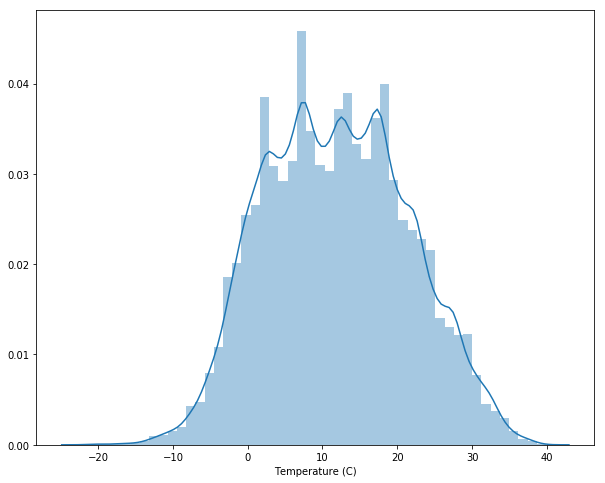

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.distplot(data['Temperature (C)'])

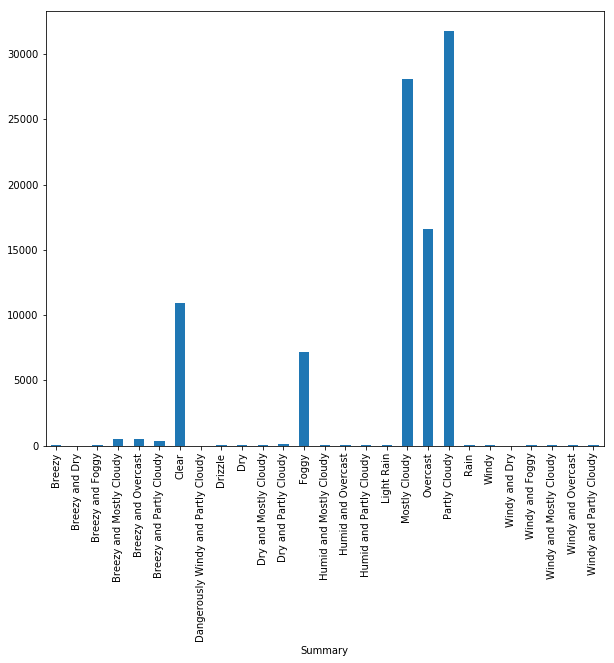

In [71]:
summary_counts.plot.bar() 
plt.show()

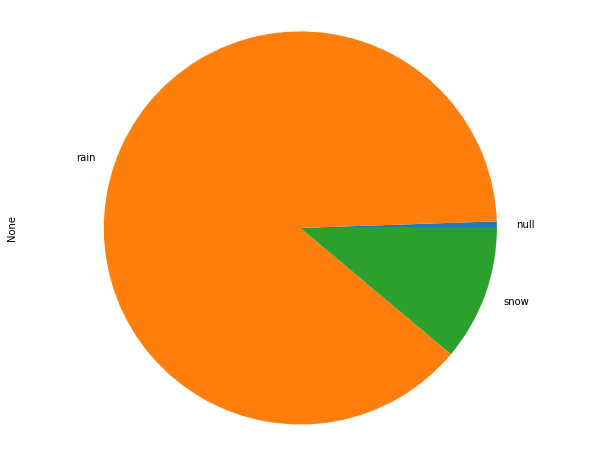

In [78]:
precip_counts.plot.pie() 
plt.axis('equal')
plt.show()

In [72]:
arithmetic_mean=peek.mean()
print(arithmetic_mean)

Temperature (C)               13.456
Apparent Temperature (C)      12.973
Humidity                       0.728
Wind Speed (km/h)             10.716
Wind Bearing (degrees)       198.333
Visibility (km)               10.784
Loud Cover                     0.000
Pressure (millibars)        1013.069
dtype: float64


In [94]:
from scipy import stats
print("humidity")
print(stats.gmean(peek.iloc[:,3]))
print("temperature")
print(stats.gmean(peek.iloc[:,5]))

humidity
12.243447672221533
temperature
0.7047409015085631


In [95]:
print("humidity")
print(stats.hmean(peek.iloc[:,3]))
print("temperature")
print(stats.hmean(peek.iloc[:,3]))

humidity
10.67992137697941
temperature
10.67992137697941


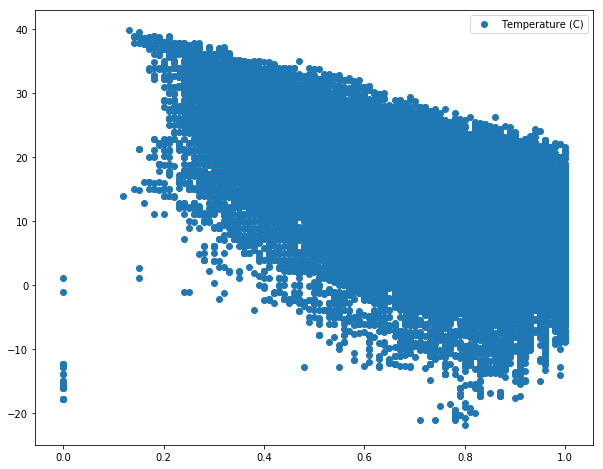

In [74]:
import matplotlib.pyplot as plt
x_values=data['Humidity']
y_values=data['Temperature (C)']
plt.scatter(x_values,y_values)
#plt.scatter(data.temp,data.area,label="TEMP")
plt.legend()
plt.show()

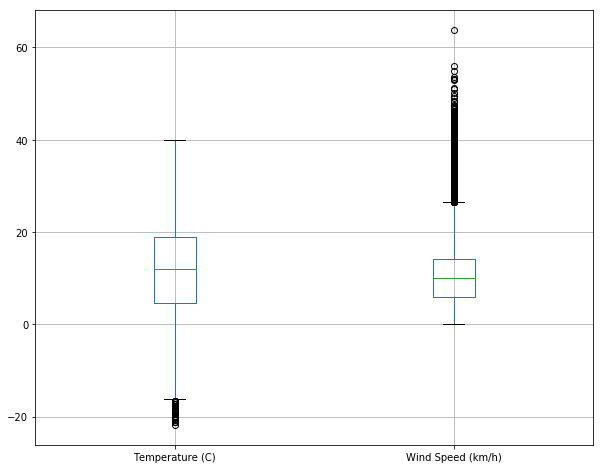

In [75]:
data.boxplot(column=['Temperature (C)','Wind Speed (km/h)'])
plt.show()

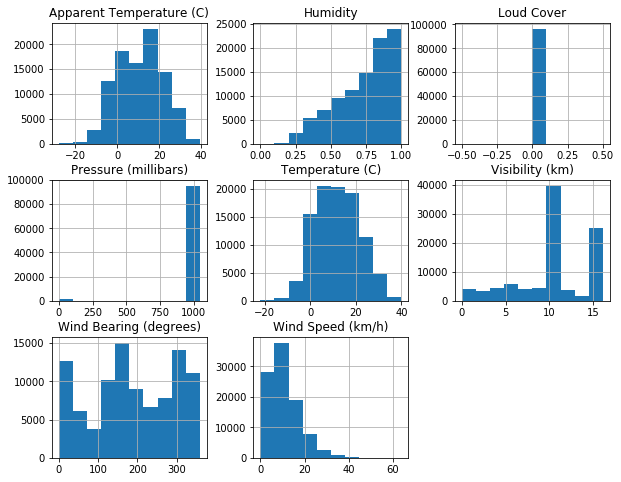

In [76]:
data.hist()
plt.show()